Introduction
This is an Employee attrition analysis and modeling
Employee attrition refers to the rate at which employees voluntarily or involuntarily leave a company over a specific period.

Problem Statement and Background
It is a critical metric for organizations to monitor, as high attrition rates can have negative impacts on productivity, morale, and overall business success. 
Understanding the reasons behind employee attrition is essential for developing effective retention strategies.

Objectives
Using machine learning to predict attrition rate


In [1]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import scipy.stats as stats
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import plotly.express as px
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

In [2]:
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn import metrics
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import chi2
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBRFClassifier
from sklearn.tree import DecisionTreeClassifier


UNDERSTANDING THE DATA

In [3]:
#import the dataset
data = pd.read_excel('INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls')
data.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3


In [4]:
data.columns.values

array(['EmpNumber', 'Age', 'Gender', 'EducationBackground',
       'MaritalStatus', 'EmpDepartment', 'EmpJobRole',
       'BusinessTravelFrequency', 'DistanceFromHome', 'EmpEducationLevel',
       'EmpEnvironmentSatisfaction', 'EmpHourlyRate', 'EmpJobInvolvement',
       'EmpJobLevel', 'EmpJobSatisfaction', 'NumCompaniesWorked',
       'OverTime', 'EmpLastSalaryHikePercent',
       'EmpRelationshipSatisfaction', 'TotalWorkExperienceInYears',
       'TrainingTimesLastYear', 'EmpWorkLifeBalance',
       'ExperienceYearsAtThisCompany', 'ExperienceYearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition',
       'PerformanceRating'], dtype=object)

In [5]:
# shape of the dataset
data.shape

(1200, 28)

In [6]:
## Data overview
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   EmpNumber                     1200 non-null   object
 1   Age                           1200 non-null   int64 
 2   Gender                        1200 non-null   object
 3   EducationBackground           1200 non-null   object
 4   MaritalStatus                 1200 non-null   object
 5   EmpDepartment                 1200 non-null   object
 6   EmpJobRole                    1200 non-null   object
 7   BusinessTravelFrequency       1200 non-null   object
 8   DistanceFromHome              1200 non-null   int64 
 9   EmpEducationLevel             1200 non-null   int64 
 10  EmpEnvironmentSatisfaction    1200 non-null   int64 
 11  EmpHourlyRate                 1200 non-null   int64 
 12  EmpJobInvolvement             1200 non-null   int64 
 13  EmpJobLevel       

In [7]:
#Checking the mising valuse 
data.isnull().sum()

EmpNumber                       0
Age                             0
Gender                          0
EducationBackground             0
MaritalStatus                   0
EmpDepartment                   0
EmpJobRole                      0
BusinessTravelFrequency         0
DistanceFromHome                0
EmpEducationLevel               0
EmpEnvironmentSatisfaction      0
EmpHourlyRate                   0
EmpJobInvolvement               0
EmpJobLevel                     0
EmpJobSatisfaction              0
NumCompaniesWorked              0
OverTime                        0
EmpLastSalaryHikePercent        0
EmpRelationshipSatisfaction     0
TotalWorkExperienceInYears      0
TrainingTimesLastYear           0
EmpWorkLifeBalance              0
ExperienceYearsAtThisCompany    0
ExperienceYearsInCurrentRole    0
YearsSinceLastPromotion         0
YearsWithCurrManager            0
Attrition                       0
PerformanceRating               0
dtype: int64

In [8]:
# Checking on duplicates

duplicates = data[data.duplicated()]
print("Duplicate Rows : ",len(duplicates))
duplicates.head()

Duplicate Rows :  0


,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating


In [9]:
#Basic statistical analysis of the dataset
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1200.0,36.918333,9.087289,18.0,30.0,36.0,43.0,60.0
DistanceFromHome,1200.0,9.165833,8.176636,1.0,2.0,7.0,14.0,29.0
EmpEducationLevel,1200.0,2.892500,1.044120,1.0,2.0,3.0,4.0,5.0
EmpEnvironmentSatisfaction,1200.0,2.715833,1.090599,1.0,2.0,3.0,4.0,4.0
EmpHourlyRate,1200.0,65.981667,20.211302,30.0,48.0,66.0,83.0,100.0
EmpJobInvolvement,1200.0,2.731667,0.707164,1.0,2.0,3.0,3.0,4.0
EmpJobLevel,1200.0,2.067500,1.107836,1.0,1.0,2.0,3.0,5.0
EmpJobSatisfaction,1200.0,2.732500,1.100888,1.0,2.0,3.0,4.0,4.0
NumCompaniesWorked,1200.0,2.665000,2.469384,0.0,1.0,2.0,4.0,9.0
EmpLastSalaryHikePercent,1200.0,15.222500,3.625918,11.0,12.0,14.0,18.0,25.0


EXPLORATORY DATA ANALYSIS

1. Attrition

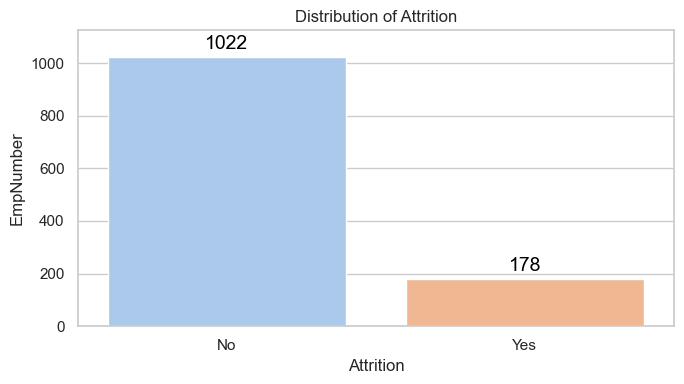

In [10]:
# number of Attrition
exit_counts = data['Attrition'].value_counts()
exit_percentages = exit_counts

sns.set_style('whitegrid')
plt.figure(figsize=(7,4))
ax = sns.barplot(x=exit_counts.index, y=exit_counts.values, palette='pastel')
ax.set(xlabel='Attrition', ylabel='EmpNumber', title='Distribution of Attrition')
plt.xticks([0, 1], ['No', 'Yes'])
plt.ylim(top=max(exit_counts.values)*1.1)

# add counting number on top of each bar
for i, v in enumerate(exit_percentages):
    ax.text(i, exit_counts.values[i]+30, f'{v}', fontsize=14, color='black', ha='center')

plt.tight_layout()
plt.show()

There are a total of 1200 employees. 1022 atrrition is No while 178 attrition is Yes.

2. Gender

In [11]:
att1=data.groupby(['Gender'],as_index=False)['Age'].count()
att1.rename(columns={'Age':'Count'},inplace=True)
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"},{"type": "pie"}]],subplot_titles=('',''))
fig.add_trace(go.Pie(values=att1['Count'],labels=['Female','Male'],hole=0.7,marker_colors=['MediumVioletRed','DeepSkyBlue']),row=1,col=1)

fig.update_traces(textposition='outside', textinfo='percent+label')
fig.update_layout(title_x=0.5,template='simple_white',showlegend=True,legend_title_text="<b>Gender",title_text='<b style="color:black; font-size:120%;">Gender Overview',font_family="Times New Roman",title_font_family="Times New Roman")
fig.update_traces(marker=dict(line=dict(color='#000000', width=1.2)))
fig.show()

60.4%(725) of the employees are Male while 39.6%(472) of the employees are Female.

Attrition based on Gender

In [12]:
att1=data.groupby('Attrition',as_index=False)['EmpNumber'].count()
att1['Count']=att1['EmpNumber']
att1.drop('EmpNumber',axis=1,inplace=True)
att2=data.groupby(['Gender','Attrition'],as_index=False)['EmpNumber'].count()
att2['Count']=att2['EmpNumber']
att2.drop('EmpNumber',axis=1,inplace=True)
fig=go.Figure()
fig=make_subplots(rows=1,cols=3)
fig = make_subplots(rows=1, cols=3, specs=[[{"type": "pie"}, {"type": "pie"}, {"type": "pie"}]],subplot_titles=('<b>Employee Attrition', '<b>Female Attrition','<b>Male Attrition'))

fig.add_trace(go.Pie(values=att1['Count'],labels=att1['Attrition'],hole=0.7,marker_colors=['DeepSkyBlue','LightCoral'],name='Employee Attrition',showlegend=False),row=1,col=1)
fig.add_trace(go.Pie(values=att2[(att2['Gender']=='Female')]['Count'],labels=att2[(att2['Gender']=='Female')]['Attrition'],hole=0.7,marker_colors=['DeepSkyBlue','LightCoral'],name='Female Attrition',showlegend=False),row=1,col=2)
fig.add_trace(go.Pie(values=att2[(att2['Gender']=='Male')]['Count'],labels=att2[(att2['Gender']=='Male')]['Attrition'],hole=0.7,marker_colors=['DeepSkyBlue','LightCoral'],name='Male Attrition',showlegend=True),row=1,col=3)
fig.update_layout(title_x=0.5,template='simple_white',showlegend=True,legend_title_text="Attrition",title_text='<b style="color:black; font-size:100%;">Employee Attrition based on Gender',font_family="Times New Roman",title_font_family="Times New Roman")
fig.update_traces(marker=dict(line=dict(color='#000000', width=1)))

In the company, Employee Attrition rate is 14.8%

Male Employee has the attrition rate of 15.9% while Female employee has 13.3% attrition rate

3. Age

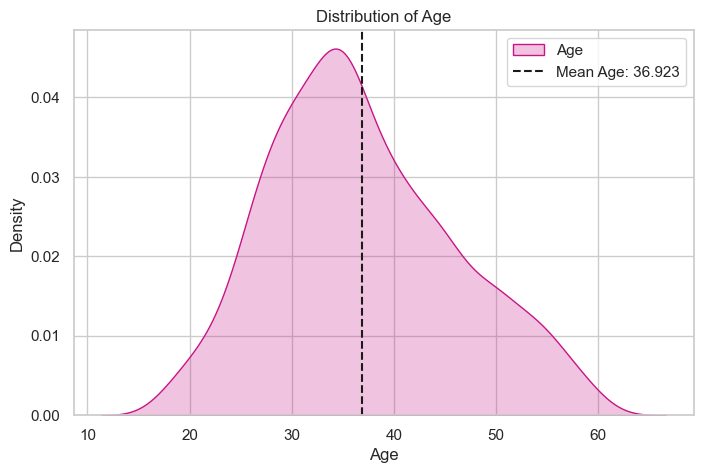

In [13]:
plt.figure(figsize=(8,5))
sns.kdeplot(x=data['Age'],color='MediumVioletRed',shade=True,label='Age')
plt.axvline(x=data['Age'].mean(),color='k',linestyle ="--",label='Mean Age: 36.923')
plt.legend()
plt.title('Distribution of Age')
plt.show()

Attrition based on Age

<Axes: xlabel='Age', ylabel='Count'>

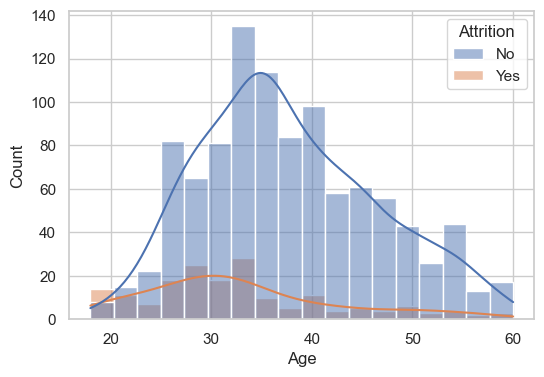

In [14]:
plt.figure(figsize = (6, 4))
sns.histplot(x = 'Age', hue = 'Attrition', data = data ,     kde=True )

The majority of employee are between 32years - 40 years old, while the range of age are 18 - 60.
Employees age 18 - 35 have a higher chance of attrition.

4. Education Background

In [15]:
fig = px.pie(data.groupby(['EducationBackground'])['EmpNumber'].count().reset_index(), 
             values='EmpNumber', 
             names='EducationBackground',
            title = 'Employee Education Background')
fig.show()

Attrition based on Education Background

In [16]:
bus=data.groupby(['EducationBackground','Attrition'],as_index=False)['EmpNumber'].count()
bus.rename(columns={'EmpNumber':'Count'},inplace=True)
fig=go.Figure()
fig = make_subplots(rows=2, cols=3, specs=[[{"type": "pie"}, {"type": "pie"}, {"type": "pie"}],[{"type": "pie"}, {"type": "pie"}, {"type": "pie"}]],subplot_titles=('Life Sciences', 'Medical','Marketing','Technical Degree','Human Resources','Other'))

fig.add_trace(go.Pie(values=bus[bus['EducationBackground']=='Life Sciences']['Count'],labels=bus[bus['EducationBackground']=='Life Sciences']['Attrition'],hole=0.7,marker_colors=['DeepSkyBlue','LightCoral'],name='Life Sciences',showlegend=False),row=1,col=1)
fig.add_trace(go.Pie(values=bus[bus['EducationBackground']=='Medical']['Count'],labels=bus[bus['EducationBackground']=='Medical']['Attrition'],hole=0.7,marker_colors=['DeepSkyBlue','LightCoral'],name='Medical',showlegend=False),row=1,col=2)
fig.add_trace(go.Pie(values=bus[bus['EducationBackground']=='Marketing']['Count'],labels=bus[bus['EducationBackground']=='Marketing']['Attrition'],hole=0.7,marker_colors=['DeepSkyBlue','LightCoral'],name='Marketing',showlegend=True),row=1,col=3)
fig.add_trace(go.Pie(values=bus[bus['EducationBackground']=='Technical Degree']['Count'],labels=bus[bus['EducationBackground']=='Technical Degree']['Attrition'],hole=0.7,marker_colors=['DeepSkyBlue','LightCoral'],name='Technical Degree',showlegend=False),row=2,col=1)
fig.add_trace(go.Pie(values=bus[bus['EducationBackground']=='Human Resources']['Count'],labels=bus[bus['EducationBackground']=='Human Resources']['Attrition'],hole=0.7,marker_colors=['DeepSkyBlue','LightCoral'],name='Human Resources',showlegend=False),row=2,col=2)
fig.add_trace(go.Pie(values=bus[bus['EducationBackground']=='Other']['Count'],labels=bus[bus['EducationBackground']=='Other']['Attrition'],hole=0.7,marker_colors=['DeepSkyBlue','LightCoral'],name='Other',showlegend=False),row=2,col=3)

fig.update_layout(title_x=0.5,template='simple_white',showlegend=True,legend_title_text="Attrition",title_text='<b style="color:black; font-size:100%;">Employee Attrition based on Education Background',font_family="Times New Roman",title_font_family="Times New Roman")
fig.update_traces(marker=dict(line=dict(color='#000000', width=1)))

Employees whose education background in Human Resources, Marketing and Technical Degree has Maximum Attrition

Low attrition is seen in Employees whose education background in Life sciences and Medical

5. Marital Status

In [17]:
fig = px.pie(data.groupby(['MaritalStatus'])['EmpNumber'].count().reset_index(), 
             values='EmpNumber', 
             names='MaritalStatus',
            title = 'Employee Marital Status')
fig.show()

Attrition based on Marital Status

In [18]:
bus=data.groupby(['MaritalStatus','Attrition'],as_index=False)['EmpNumber'].count()
bus.rename(columns={'EmpNumber':'Count'},inplace=True)
fig=go.Figure()
fig = make_subplots(rows=2, cols=3, specs=[[{"type": "pie"}, {"type": "pie"}, {"type": "pie"}],[{"type": "pie"}, {"type": "pie"}, {"type": "pie"}]],subplot_titles=('Married', 'Divorced','Single'))

fig.add_trace(go.Pie(values=bus[bus['MaritalStatus']=='Married']['Count'],labels=bus[bus['MaritalStatus']=='Married']['Attrition'],hole=0.7,marker_colors=['DeepSkyBlue','LightCoral'],name='Married',showlegend=False),row=1,col=1)
fig.add_trace(go.Pie(values=bus[bus['MaritalStatus']=='Divorced']['Count'],labels=bus[bus['MaritalStatus']=='Divorced']['Attrition'],hole=0.7,marker_colors=['DeepSkyBlue','LightCoral'],name='Divorced',showlegend=False),row=1,col=2)
fig.add_trace(go.Pie(values=bus[bus['MaritalStatus']=='Single']['Count'],labels=bus[bus['MaritalStatus']=='Single']['Attrition'],hole=0.7,marker_colors=['DeepSkyBlue','LightCoral'],name='Single',showlegend=True),row=1,col=3)

fig.update_layout(title_x=0.5,template='simple_white',showlegend=True,legend_title_text="Attrition",title_text='<b style="color:black; font-size:100%;">Employee Attrition based on Marital Status',font_family="Times New Roman",title_font_family="Times New Roman")
fig.update_traces(marker=dict(line=dict(color='#000000', width=1)))

Single employees have a higher attrition rate of 24.5%

6. Employee Department

In [19]:
fig = px.pie(data.groupby(['EmpDepartment'])['EmpNumber'].count().reset_index(), 
             values='EmpNumber', 
             names='EmpDepartment',
            title = 'Employee  Department')
fig.show()

Employee Attrtition by Department

In [20]:
bus=data.groupby(['EmpDepartment','Attrition'],as_index=False)['EmpNumber'].count()
bus.rename(columns={'EmpNumber':'Count'},inplace=True)
fig=go.Figure()
fig = make_subplots(rows=2, cols=3, specs=[[{"type": "pie"}, {"type": "pie"}, {"type": "pie"}],[{"type": "pie"}, {"type": "pie"}, {"type": "pie"}]],subplot_titles=('Development', 'Data Science','Finance','Human Resources', 'Research & Development','Sales'))

fig.add_trace(go.Pie(values=bus[bus['EmpDepartment']=='Development']['Count'],labels=bus[bus['EmpDepartment']=='Development']['Attrition'],hole=0.7,marker_colors=['DeepSkyBlue','LightCoral'],name='Development',showlegend=False),row=1,col=1)
fig.add_trace(go.Pie(values=bus[bus['EmpDepartment']=='Finance']['Count'],labels=bus[bus['EmpDepartment']=='Finance']['Attrition'],hole=0.7,marker_colors=['DeepSkyBlue','LightCoral'],name='Finance',showlegend=False),row=1,col=2)
fig.add_trace(go.Pie(values=bus[bus['EmpDepartment']=='Data Science']['Count'],labels=bus[bus['EmpDepartment']=='Data Science']['Attrition'],hole=0.7,marker_colors=['DeepSkyBlue','LightCoral'],name='Data Science',showlegend=True),row=1,col=3)
fig.add_trace(go.Pie(values=bus[bus['EmpDepartment']=='Research & Development']['Count'],labels=bus[bus['EmpDepartment']=='Research & Development']['Attrition'],hole=0.7,marker_colors=['DeepSkyBlue','LightCoral'],name='Research & Development',showlegend=False),row=2,col=1)
fig.add_trace(go.Pie(values=bus[bus['EmpDepartment']=='Human Resources']['Count'],labels=bus[bus['EmpDepartment']=='Human Resources']['Attrition'],hole=0.7,marker_colors=['DeepSkyBlue','LightCoral'],name='Human Resources',showlegend=False),row=2,col=2)
fig.add_trace(go.Pie(values=bus[bus['EmpDepartment']=='Sales']['Count'],labels=bus[bus['EmpDepartment']=='Sales']['Attrition'],hole=0.7,marker_colors=['DeepSkyBlue','LightCoral'],name='Sales',showlegend=False),row=2,col=3)

fig.update_layout(title_x=0.5,template='simple_white',showlegend=True,legend_title_text="Attrition",title_text='<b style="color:black; font-size:100%;">Employee Attrition based on Education Background',font_family="Times New Roman",title_font_family="Times New Roman")
fig.update_traces(marker=dict(line=dict(color='#000000', width=1)))

Sales, Development and Research & Development has the highest attrition rate of 18.8%, 14.1% and 14.8% respectively.

7. Employee Job role

In [21]:
fig = px.pie(data.groupby(['EmpJobRole'])['EmpNumber'].count().reset_index(), 
             values='EmpNumber', 
             names='EmpJobRole',
            title = 'Employee Job Role')
fig.show()

Attrition by Employee Job role

In [22]:
fig = px.bar(data.groupby(['EmpJobRole',
                                                'Attrition'])['EmpNumber'].count().reset_index(),
             x="EmpNumber",
             y="EmpJobRole", 
             color="Attrition", 
             text = 'EmpNumber'
            )
fig.show()

Sales executives and Developers has the highest attrition

8. Business Travel Frequency

In [23]:
fig = px.pie(data.groupby(['BusinessTravelFrequency'])['EmpNumber'].count().reset_index(), 
             values='EmpNumber', 
             names='BusinessTravelFrequency',
            title = 'Employee Business Travel Frequency')
fig.show()

Attrition by Business Travel Frequency

In [24]:
bus=data.groupby(['BusinessTravelFrequency','Attrition'],as_index=False)['EmpNumber'].count()
bus.rename(columns={'EmpNumber':'Count'},inplace=True)
fig=go.Figure()
fig = make_subplots(rows=2, cols=3, specs=[[{"type": "pie"}, {"type": "pie"}, {"type": "pie"}],[{"type": "pie"}, {"type": "pie"}, {"type": "pie"}]],subplot_titles=('Non-Travel', 'Travel_Frequently','Travel_Rarely'))

fig.add_trace(go.Pie(values=bus[bus['BusinessTravelFrequency']=='Non-Travel']['Count'],labels=bus[bus['BusinessTravelFrequency']=='Non-Travel']['Attrition'],hole=0.7,marker_colors=['DeepSkyBlue','LightCoral'],name='Non-Travel',showlegend=False),row=1,col=1)
fig.add_trace(go.Pie(values=bus[bus['BusinessTravelFrequency']=='Travel_Frequently']['Count'],labels=bus[bus['BusinessTravelFrequency']=='Travel_Frequently']['Attrition'],hole=0.7,marker_colors=['DeepSkyBlue','LightCoral'],name='Travel_Frequently',showlegend=False),row=1,col=2)
fig.add_trace(go.Pie(values=bus[bus['BusinessTravelFrequency']=='Travel_Rarely']['Count'],labels=bus[bus['BusinessTravelFrequency']=='Travel_Rarely']['Attrition'],hole=0.7,marker_colors=['DeepSkyBlue','LightCoral'],name='Travel_Rarely',showlegend=True),row=1,col=3)

fig.update_layout(title_x=0.5,template='simple_white',showlegend=True,legend_title_text="Attrition",title_text='<b style="color:black; font-size:100%;">Employee Attrition based on Business Travel Frequency',font_family="Times New Roman",title_font_family="Times New Roman")
fig.update_traces(marker=dict(line=dict(color='#000000', width=1)))

Out of the 70.5% of the total employees who rarely travels, 13.8% leave the company

9. Attrition base on TotalWorkExperienceInYears, ExperienceYearsAtThisCompany, YearsSinceLastPromotion and ExperienceYearsInCurrentRole


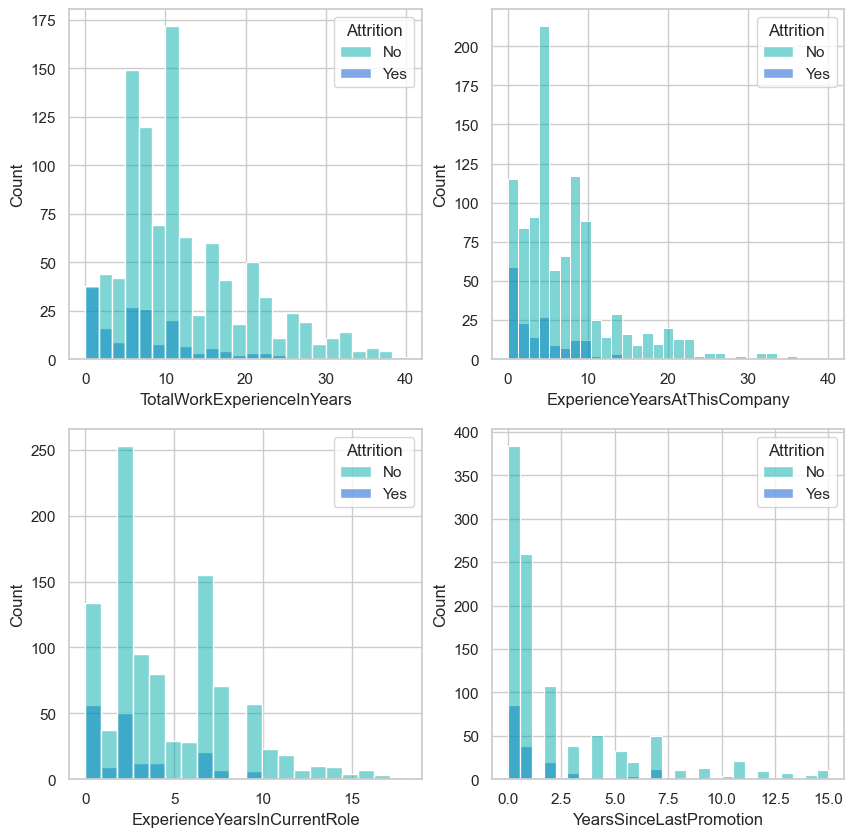

In [25]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.histplot(x= 'TotalWorkExperienceInYears' ,data =data ,palette='winter_r',hue='Attrition')
plt.subplot(2,2,2)
sns.histplot(x= 'ExperienceYearsAtThisCompany' ,data =data ,palette='winter_r',hue='Attrition')
plt.subplot(2,2,3)
sns.histplot(x= 'ExperienceYearsInCurrentRole' ,data =data ,palette='winter_r',hue='Attrition')
plt.subplot(2,2,4)
sns.histplot(x= 'YearsSinceLastPromotion' ,data =data ,palette='winter_r',hue='Attrition')
plt.show()


More employees tend to leave with less than 10 years of experience
Most employees tend toleave with less than 10 years in the company
More employees tend to leave with less than 5 years in the current role
More employees tend to leave with less than 2.5 years of since last promotion

10. Attrition based on Distance From Home

<Axes: xlabel='DistanceFromHome', ylabel='count'>

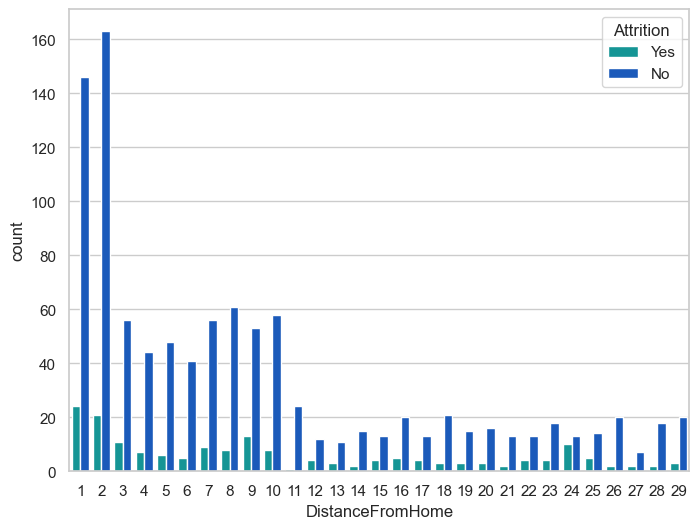

In [26]:
plt.figure(figsize = (8 , 6))
sns.countplot(x= 'DistanceFromHome' ,data = data ,palette='winter_r'  ,hue =data['Attrition'])

Most employees distance from home 2
Employees with distance of less tha 10 have the highest attrition

11. Attrition based on Employee Hourly Rate

<Axes: xlabel='EmpHourlyRate', ylabel='Count'>

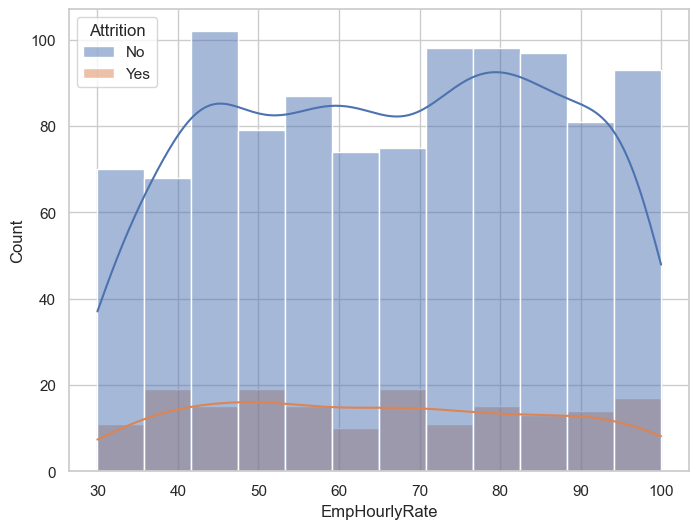

In [27]:
plt.figure(figsize = (8, 6))
sns.histplot(x = 'EmpHourlyRate', hue = 'Attrition', data = data ,     kde=True )

Hourly rate is between 30 and 100
Employees with hourly rate of 40, 50 and 70 have high attrition.

12. OverTime

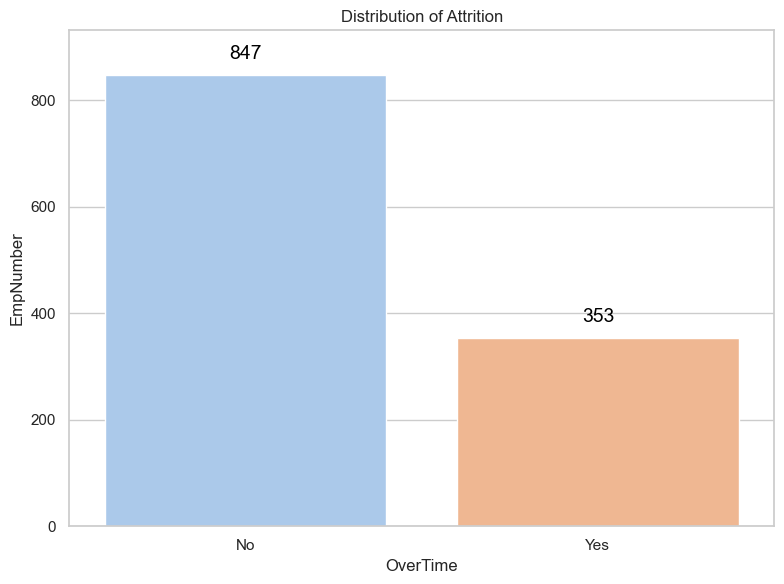

In [28]:
# number of Attrition
exit_counts = data['OverTime'].value_counts()
exit_percentages = exit_counts

sns.set_style('whitegrid')
plt.figure(figsize=(8,6))
ax = sns.barplot(x=exit_counts.index, y=exit_counts.values, palette='pastel')
ax.set(xlabel='OverTime', ylabel='EmpNumber', title='Distribution of Attrition')
plt.xticks([0, 1], ['No', 'Yes'])
plt.ylim(top=max(exit_counts.values)*1.1)

# add counting number on top of each bar
for i, v in enumerate(exit_percentages):
    ax.text(i, exit_counts.values[i]+30, f'{v}', fontsize=14, color='black', ha='center')

plt.tight_layout()
plt.show()

<Axes: xlabel='OverTime', ylabel='count'>

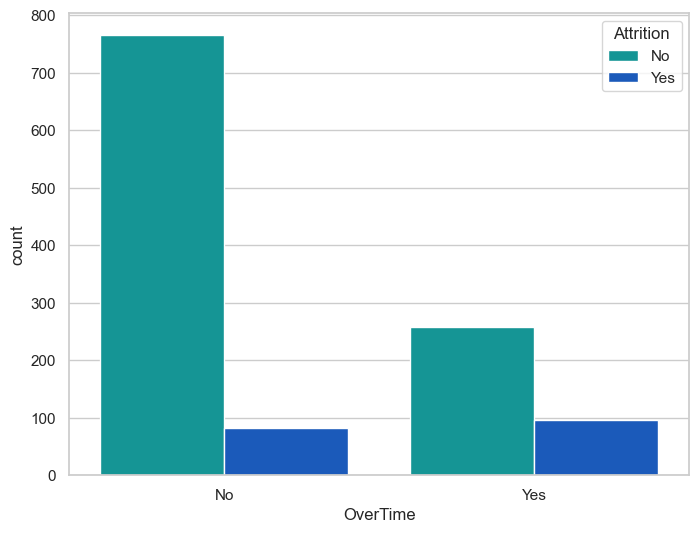

In [29]:
plt.figure(figsize = (8 , 6))
sns.countplot(x= 'OverTime' ,data = data ,palette='winter_r'  ,hue =data['Attrition'])

FEATURE SELECTION

This is the method of reducing the input variable to your model by using only relevant data and getting rid of noise in data.

In [30]:
#Removing all unimportant column
data = data.drop(['EmpNumber'], axis = 1)

data.head()

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,4,...,4,10,2,2,10,7,0,8,No,3
1,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,4,...,4,20,2,3,7,7,1,7,No,3
2,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,4,...,3,20,2,3,18,13,1,12,No,4
3,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,2,...,2,23,2,2,21,6,12,6,No,3
4,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,1,...,4,10,1,3,2,2,2,2,No,3


In [31]:
#categorical features
cat_features=list((data.select_dtypes(exclude=['float64','int64']).columns))
print(cat_features)

['Gender', 'EducationBackground', 'MaritalStatus', 'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency', 'OverTime', 'Attrition']


In [32]:
#Numerical features
Num_features=list(data.select_dtypes(include=['float64','int64']).columns)
Num_features

['Age',
 'DistanceFromHome',
 'EmpEducationLevel',
 'EmpEnvironmentSatisfaction',
 'EmpHourlyRate',
 'EmpJobInvolvement',
 'EmpJobLevel',
 'EmpJobSatisfaction',
 'NumCompaniesWorked',
 'EmpLastSalaryHikePercent',
 'EmpRelationshipSatisfaction',
 'TotalWorkExperienceInYears',
 'TrainingTimesLastYear',
 'EmpWorkLifeBalance',
 'ExperienceYearsAtThisCompany',
 'ExperienceYearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager',
 'PerformanceRating']

In [33]:
#Identify the target variable
y= data['Attrition']

1. ANOVA F-test Feature Selection for (Numerical Input, Categorical Output)

ANOVA is used when one variable is numeric and one is categorical, such as numerical input variables and a classification target variable in a classification task.
The classification target variable is 'Attrition'

In [34]:
Num_selec_X=data[Num_features]

Num_selec_X.columns,y

(Index(['Age', 'DistanceFromHome', 'EmpEducationLevel',
        'EmpEnvironmentSatisfaction', 'EmpHourlyRate', 'EmpJobInvolvement',
        'EmpJobLevel', 'EmpJobSatisfaction', 'NumCompaniesWorked',
        'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
        'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
        'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
        'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
        'YearsWithCurrManager', 'PerformanceRating'],
       dtype='object'),
 0        No
 1        No
 2        No
 3        No
 4        No
        ... 
 1195     No
 1196     No
 1197     No
 1198     No
 1199    Yes
 Name: Attrition, Length: 1200, dtype: object)

Applying ANOVA F-test

In [35]:
# feature selection
def select_features(X_train, y_train, X_test):
    # configure to select all features
    fs = SelectKBest(score_func=f_classif, k='all')
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

In [36]:
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(Num_selec_X, y, test_size=0.33, random_state=1)

# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

The resulting feature importance as dataframe

In [37]:
# create the feature importance dataframe
feature_importance_df = pd.DataFrame({'Feature': Num_selec_X.columns, 'Score': fs.scores_})

# add a column for the index starting from 0
feature_importance_df['Number'] = range(len(feature_importance_df))

# set the index to the new column and drop the old index column
feature_importance_df.set_index('Number', inplace=True)

# print the resulting dataframe
print(feature_importance_df)

                             Feature      Score
Number                                         
0                                Age  22.879065
1                   DistanceFromHome   4.776089
2                  EmpEducationLevel   1.621336
3         EmpEnvironmentSatisfaction  10.925398
4                      EmpHourlyRate   0.572946
5                  EmpJobInvolvement  26.714062
6                        EmpJobLevel  23.011394
7                 EmpJobSatisfaction   8.515730
8                 NumCompaniesWorked   0.789206
9           EmpLastSalaryHikePercent   0.293952
10       EmpRelationshipSatisfaction   0.324277
11        TotalWorkExperienceInYears  26.249996
12             TrainingTimesLastYear   0.076462
13                EmpWorkLifeBalance   1.264670
14      ExperienceYearsAtThisCompany  14.734422
15      ExperienceYearsInCurrentRole  24.060941
16           YearsSinceLastPromotion   1.835943
17              YearsWithCurrManager  18.360742
18                 PerformanceRating   0

The resulting feature importance as graph

In [38]:
# create trace
trace = go.Bar(x=Num_selec_X.columns, y=fs.scores_)

# create layout
layout = go.Layout(title='Feature Importance Scores of the numerical features', xaxis=dict(tickangle=-45))

# create figure
fig = go.Figure(data=[trace], layout=layout)

# update figure size
fig.update_layout(width=800, height=500)

# show figure
fig.show()

The most important numerical features are Employee Job involvement, Total Work Experience in Years and Experience Years in Current Role

2. Chi-Squared test (Categorical Input, Categorical Output)

The Chi-square test is used for categorical features in a dataset. 
We calculate Chi-square between each feature and the target and select the desired number of features with the best Chi-square scores. 

Feature engineering¶

In [39]:
encoded_X=data[cat_features].drop('Attrition', axis=1)
encoded_X

,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,OverTime
0,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,No
1,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,No
2,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,Yes
3,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,No
4,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,No
...,...,...,...,...,...,...,...
1195,Female,Medical,Divorced,Sales,Sales Executive,Travel_Frequently,Yes
1196,Male,Life Sciences,Single,Development,Senior Developer,Travel_Rarely,No
1197,Male,Medical,Married,Development,Senior Developer,Travel_Rarely,Yes
1198,Female,Medical,Single,Data Science,Data Scientist,Travel_Rarely,No


Ordinal Encoder

In [40]:
# create an instance of the OrdinalEncoder
encoder = OrdinalEncoder()

# define the columns to encode
cols_to_encode = ['Gender', 'EducationBackground', 'MaritalStatus', 'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency', 'OverTime']

# fit the encoder to the data
encoder.fit(encoded_X[cols_to_encode])

# transform the specified columns
encoded_X[cols_to_encode] = encoder.transform(encoded_X[cols_to_encode])
encoded_X

,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,OverTime
0,1.0,2.0,2.0,5.0,13.0,2.0,0.0
1,1.0,2.0,2.0,5.0,13.0,2.0,0.0
2,1.0,1.0,1.0,5.0,13.0,1.0,1.0
3,1.0,0.0,0.0,3.0,8.0,2.0,0.0
4,1.0,2.0,2.0,5.0,13.0,2.0,0.0
...,...,...,...,...,...,...,...
1195,0.0,3.0,0.0,5.0,13.0,1.0,1.0
1196,1.0,1.0,2.0,1.0,15.0,2.0,0.0
1197,1.0,3.0,1.0,1.0,15.0,2.0,1.0
1198,0.0,3.0,2.0,0.0,1.0,2.0,0.0


Appling Chi-Squared test

In [41]:
fs = SelectKBest(score_func=chi2, k='all')
fs.fit(encoded_X, y)
# i'll make a copy of encoded_X to use this copy for ploting 
encoded_X_copy=encoded_X.copy()
X = fs.transform(encoded_X)

The resulting feature importance as dataframe

In [42]:
# create the feature importance dataframe
feature_importance_df = pd.DataFrame({'Feature': encoded_X_copy.columns, 'Score': fs.scores_})

# add a column for the index starting from 0
feature_importance_df['Number'] = range(len(feature_importance_df))

# set the index to the new column and drop the old index column
feature_importance_df.set_index('Number', inplace=True)

# print the resulting dataframe
print(feature_importance_df)

                        Feature      Score
Number                                    
0                        Gender   0.607347
1           EducationBackground   0.679210
2                 MaritalStatus  15.518478
3                 EmpDepartment   2.474793
4                    EmpJobRole   4.218256
5       BusinessTravelFrequency   0.018065
6                      OverTime  42.702490


The resulting feature importance as graph

In [43]:
# create trace
trace = go.Bar(x=list(encoded_X_copy.columns), y=fs.scores_)

# create layout
layout = go.Layout(title='Feature Importance Scores of the categorical features', xaxis=dict(tickangle=-45))

# create figure
fig = go.Figure(data=[trace], layout=layout)

# update figure size
fig.update_layout(width=800, height=500)

# show figure
fig.show()

The most important categorical feature is Overtime

DATA PREPROCESSING

In [44]:
#use label encoding to convert categorical variables to numerical
data['Attrition'].replace(to_replace='Yes', value=1, inplace=True)
data['Attrition'].replace(to_replace='No',  value=0, inplace=True)

def encode_data(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series

data = data.apply(lambda x: encode_data(x))
data.head()

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,32,1,2,2,5,13,2,10,3,4,...,4,10,2,2,10,7,0,8,0,3
1,47,1,2,2,5,13,2,14,4,4,...,4,20,2,3,7,7,1,7,0,3
2,40,1,1,1,5,13,1,5,4,4,...,3,20,2,3,18,13,1,12,0,4
3,41,1,0,0,3,8,2,10,4,2,...,2,23,2,2,21,6,12,6,0,3
4,60,1,2,2,5,13,2,16,4,1,...,4,10,1,3,2,2,2,2,0,3


This is crucial because many machine learning algorithms require numeric input data. By converting categorical data into numeric form, we make the dataset suitable for training and evaluating machine learning models.

Splitting the data into train and test sets

In [45]:
over = SMOTE(sampling_strategy = 1)

x = data.drop("Attrition", axis = 1).values
y = data['Attrition'].values

In [46]:
plt.figure(figsize=(14,7))
data.corr()['Attrition'].sort_values(ascending = False)

Attrition                       1.000000
OverTime                        0.224535
MaritalStatus                   0.162969
DistanceFromHome                0.063248
EmpDepartment                   0.048006
NumCompaniesWorked              0.037643
EmpJobRole                      0.037508
Gender                          0.035758
EducationBackground             0.027161
BusinessTravelFrequency         0.007217
EmpLastSalaryHikePercent       -0.009448
EmpHourlyRate                  -0.026313
TrainingTimesLastYear          -0.035047
EmpRelationshipSatisfaction    -0.037179
PerformanceRating              -0.039796
EmpEducationLevel              -0.049118
YearsSinceLastPromotion        -0.057199
EmpWorkLifeBalance             -0.068624
EmpJobSatisfaction             -0.081783
EmpEnvironmentSatisfaction     -0.123490
ExperienceYearsAtThisCompany   -0.142456
EmpJobInvolvement              -0.153360
YearsWithCurrManager           -0.158745
ExperienceYearsInCurrentRole   -0.173895
EmpJobLevel     

<Figure size 1400x700 with 0 Axes>

In [47]:
# split data into target and features
X = data.drop(columns = ['Attrition'])
y = data['Attrition'].values

In [48]:
# split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state = 40, stratify=y)

In [49]:
# print the size of train and test data
print(X_train.shape, X_test.shape, X.shape)

(840, 26) (360, 26) (1200, 26)


In [50]:
# Scaling data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

MODEL EVALUATION AND PREDICTION

1. KNN- Neighbors

In [51]:
knn=KNeighborsClassifier(n_neighbors=7)

knn.fit(X_train,y_train)

y_pred=knn.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,mean_squared_error,r2_score
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print("Training Score: ",knn.score(X_train,y_train)*100)
print(knn.score(X_test,y_test))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92       307
           1       0.50      0.09      0.16        53

    accuracy                           0.85       360
   macro avg       0.68      0.54      0.54       360
weighted avg       0.81      0.85      0.81       360

[[302   5]
 [ 48   5]]
Training Score:  87.38095238095238
0.8527777777777777


In [52]:
print(accuracy_score(y_test,y_pred)*100)

85.27777777777777


In [53]:
conf_matrix_knn = confusion_matrix(y_test, y_pred)
print(conf_matrix_knn )

[[302   5]
 [ 48   5]]


There are total 302+5=307 actual non-churn values and the algorithm predicts 302 of them as non churn and 5 of them as churn. While there are 48+5=53 actual churn values and the algorithm predicts 48 of them as non churn values and 5 of them as churn values.

2. Random Forest

In [54]:
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [55]:
y_pred=rfc.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,mean_squared_error
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print("Training Score: ",rfc.score(X_train,y_train)*100)

              precision    recall  f1-score   support

           0       0.86      0.98      0.92       307
           1       0.42      0.09      0.15        53

    accuracy                           0.85       360
   macro avg       0.64      0.54      0.53       360
weighted avg       0.80      0.85      0.80       360

[[300   7]
 [ 48   5]]
Training Score:  100.0


In [56]:
print(accuracy_score(y_test,y_pred)*100)

84.72222222222221


In [57]:
conf_matrix_rfc = confusion_matrix(y_test, y_pred)
print(conf_matrix_rfc)

[[300   7]
 [ 48   5]]


There are total 300+7=307 actual non-churn values and the algorithm predicts 300 of them as non churn and 7 of them as churn. While there are 48+5=53 actual churn values and the algorithm predicts 48 of them as non churn values and 5 of them as churn values.

3. Logistic regression

In [58]:
reg = LogisticRegression()
reg.fit(X_train,y_train)

LogisticRegression()

In [59]:
y_pred=reg.predict(X_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,r2_score
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print("Training Score: ",reg.score(X_train,y_train)*100)

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       307
           1       0.73      0.36      0.48        53

    accuracy                           0.89       360
   macro avg       0.81      0.67      0.71       360
weighted avg       0.87      0.89      0.87       360

[[300   7]
 [ 34  19]]
Training Score:  88.09523809523809


In [60]:
print(accuracy_score(y_test,y_pred)*100)

88.61111111111111


In [61]:
conf_matrix_reg = confusion_matrix(y_test, y_pred)
print(conf_matrix_reg)

[[300   7]
 [ 34  19]]


There are total 300+7=307 actual non-churn values and the algorithm predicts 300 of them as non churn and 7 of them as churn. While there are 34+19=53 actual churn values and the algorithm predicts 34 of them as non churn values and 19 of them as churn values.

4. Decision Tree Classifier

In [62]:
dtree = DecisionTreeClassifier(max_depth=6, random_state=123)

dtree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6, random_state=123)

In [63]:
y_pred=dtree.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,mean_squared_error
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print("Training Score: ",dtree.score(X_train,y_train)*100)

              precision    recall  f1-score   support

           0       0.88      0.94      0.91       307
           1       0.40      0.23      0.29        53

    accuracy                           0.84       360
   macro avg       0.64      0.58      0.60       360
weighted avg       0.81      0.84      0.82       360

[[289  18]
 [ 41  12]]
Training Score:  92.02380952380952


In [64]:
print(accuracy_score(y_test,y_pred)*100)

83.61111111111111


In [65]:
conf_matrix_dtree = confusion_matrix(y_test, y_pred)
print(conf_matrix_dtree)

[[289  18]
 [ 41  12]]


There are total 289+18=307 actual non-churn values and the algorithm predicts 289 of them as non churn and 18 of them as churn. While there are 41+5=12 actual churn values and the algorithm predicts 41 of them as non churn values and 12 of them as churn values.

5. Gradient Boosting Classifier

In [66]:
gbc=GradientBoostingClassifier()
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [67]:
y_pred=gbc.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,mean_squared_error,r2_score
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print("Training Score: ",gbc.score(X_train,y_train)*100)
print(gbc.score(X_test,y_test))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93       307
           1       0.68      0.28      0.40        53

    accuracy                           0.88       360
   macro avg       0.78      0.63      0.67       360
weighted avg       0.86      0.88      0.85       360

[[300   7]
 [ 38  15]]
Training Score:  95.71428571428572
0.875


In [68]:
print(accuracy_score(y_test,y_pred)*100)

87.5


In [69]:
conf_matrix_gbc = confusion_matrix(y_test, y_pred)
print(conf_matrix_gbc)

[[300   7]
 [ 38  15]]


There are total 300+7=307 actual non-churn values and the algorithm predicts 300 of them as non churn and 7 of them as churn. While there are 38+15=53 actual churn values and the algorithm predicts 38 of them as non churn values and 15 of them as churn values.

6. XG Boost

In [70]:
model = XGBClassifier()
model.fit(X_train, y_train)
preds = model.predict(X_test)
metrics.accuracy_score(y_test, preds)

0.875

In [71]:
print(accuracy_score(y_test,y_pred)*100)

87.5


In [72]:
conf_matrix_xgb = confusion_matrix(y_test, y_pred)
print(conf_matrix_xgb)

[[300   7]
 [ 38  15]]


There are total 300+7=307 actual non-churn values and the algorithm predicts 300 of them as non churn and 7 of them as churn. While there are 38+15=53 actual churn values and the algorithm predicts 38 of them as non churn values and 15 of them as churn values.

Logistic regression has the most accuracy prediction with an accuracy score of 88.61%

RECOMMENDATION

Company should appreciate their employees who stayed more than 10 years by still giving promotion not just in their first 10 years and they should get a raise in their salaries.
To avoid attrition, the company have to:
1.  Fairly pay employees at the same job level, same job involvement, same job role with almost equal monthly income.
2. Investing in Employee Development: - Offer stock options to more employees especially new recruits as an incentive. 
3. Offering Competitive Compensation and Benefits: - Increase allowance for employees to work overtime, and make sure that those working overtime are being paid more than those who are not. 
4. Creating a Positive Work Environment to create a more stable and productive workforce: - companies should remember to appreciate their employees and work on the harmonic balance of their company.
5.  Improving Communication
6. Enhancing Work-Life Balance 
